# Pandas 기초연습문제




In [1]:
import pandas as pd #padas를 import

### 1. 딕셔너리를 이용하여 아래와 같은 모양이 되도록 data frame을 생성하시오.

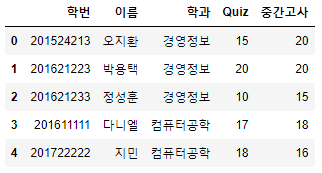

In [2]:
score={'학번':[201524213,201621223,201621233, 201611111, 201722222],
       '이름':['오지환','박용택','정성훈', '다니엘', '지민'],
       '학과':['경영정보','경영정보','경영정보','컴퓨터공학','컴퓨터공학'],
       'Quiz':[15,20,10,17,18],
       '중간고사':[20,20,15,18,16]}

df= pd.DataFrame(score) #score 에 저장된 내용을 DataFrame으로 전환
df

,학번,이름,학과,Quiz,중간고사
0,201524213,오지환,경영정보,15,20
1,201621223,박용택,경영정보,20,20
2,201621233,정성훈,경영정보,10,15
3,201611111,다니엘,컴퓨터공학,17,18
4,201722222,지민,컴퓨터공학,18,16


In [3]:
df['학번'] #학번 컬럼을 불러옴


0    201524213
1    201621223
2    201621233
3    201611111
4    201722222
Name: 학번, dtype: int64

### 2. 위에서 생성한 데이터프레임으로부터 인덱싱을 이용하여 이름과 중간고사를 추출하시오.


In [4]:
df[['이름', '중간고사']] #인덱싱으로 접근


,이름,중간고사
0,오지환,20
1,박용택,20
2,정성훈,15
3,다니엘,18
4,지민,16


### 3. reindex를 이용하여 2, 0, 4, 1, 3 순으로 순서를 변경하시오.


In [5]:
df = df.reindex([2, 0, 4, 1, 3]) #순서를 재지정 -> reindex
df

,학번,이름,학과,Quiz,중간고사
2,201621233,정성훈,경영정보,10,15
0,201524213,오지환,경영정보,15,20
4,201722222,지민,컴퓨터공학,18,16
1,201621223,박용택,경영정보,20,20
3,201611111,다니엘,컴퓨터공학,17,18


### 4. iloc과 loc을 각각 이용하여 박용택 학생의 record를 추출하시오. (iloc으로 한번, loc으로 한번 수행)


In [22]:
#print(df.iloc[3]) #행단위의 출력
print(df.loc[1]) #index 단위의 출력

학번      201621223
이름            박용택
학과           경영정보
Quiz           20
중간고사           20
Name: 1, dtype: object


### 5. iloc과 loc을 각각 이용하여 모든 학생의 이름과 중간고사 점수를 추출하시오. (iloc으로 한번, loc으로 한번 수행)¶


In [7]:
print(df.iloc[:, [1, 4]])
print(df.loc[:, ['이름', '중간고사']])

    이름  중간고사
2  정성훈    15
0  오지환    20
4   지민    16
1  박용택    20
3  다니엘    18
    이름  중간고사
2  정성훈    15
0  오지환    20
4   지민    16
1  박용택    20
3  다니엘    18


### 6. 중간고사 점수의 평균을 구하시오.


In [8]:
df['중간고사'].mean() #평균 mean

17.8

### 7. 중간고사 점수가 가장 낮은 학생의 index를 구하시오.


In [9]:
df['중간고사'].idxmin() #가장 작은 index -> idxmin

2

### 8. 퀴즈 점수가 가장 높은 학생의 학번을 구하시오.


In [10]:
df.loc[df['Quiz'].idxmax(), '학번'] # 가장 높은 점수에서 학번 출력

201621223

### 9. 위 데이터프레임의 각 열에 대해서 개수, 평균, 표준편차, 최소최대값 등의 다양한 통계량을 출력하시오.


In [11]:
df.describe() #describe()-> df에 대한 통계정보 출력

,학번,Quiz,중간고사
count,5.000000e+00,5.000000,5.000000
mean,2.016200e+08,16.000000,17.800000
std,7.018995e+04,3.807887,2.280351
min,2.015242e+08,10.000000,15.000000
25%,2.016111e+08,15.000000,16.000000
50%,2.016212e+08,17.000000,18.000000
75%,2.016212e+08,18.000000,20.000000
max,2.017222e+08,20.000000,20.000000


### 10. 위 데이터프레임을 중간고사 점수에 따라 내림차순으로 정렬하시오.


In [12]:
df.sort_values('중간고사', ascending=False) #내림차순 정렬

,학번,이름,학과,Quiz,중간고사
0,201524213,오지환,경영정보,15,20
1,201621223,박용택,경영정보,20,20
3,201611111,다니엘,컴퓨터공학,17,18
4,201722222,지민,컴퓨터공학,18,16
2,201621233,정성훈,경영정보,10,15


### 11. 학생 중에서 퀴즈 점수가 평균 이상인 학생들의 이름을 출력하시오.


In [13]:
quiz_mean = df['Quiz'].mean() #평균을 지정
df[df['Quiz'] > quiz_mean]['이름'] #점수중, 평균보다 높은 사람의 이름을 출력

4     지민
1    박용택
3    다니엘
Name: 이름, dtype: object

### 12. 학생 중에서 퀴즈와 중간고사 점수 모두 평균 이상인 학생들의 record를 출력하시오.


In [14]:
quiz_mean = df['Quiz'].mean() #퀴즈 평균 저장
mid_mean = df['중간고사'].mean() #중간고사 평균 저장
df[(df['Quiz'] > quiz_mean) & (df['중간고사'] > mid_mean)] #퀴즈가 평균보다 높으면서 중간고사도 평균보다 높은 행 출력

,학번,이름,학과,Quiz,중간고사
1,201621223,박용택,경영정보,20,20
3,201611111,다니엘,컴퓨터공학,17,18


### 13. value_counts를 이용하여 학과 별로 학생의 수를 구하시오.


In [15]:
df['학과'].value_counts() #학과의 학생수 출력

경영정보     3
컴퓨터공학    2
Name: 학과, dtype: int64

### 14. groupby를 이용하여 학과 별로 중간고사의 평균을 구하시오.


In [16]:
df.groupby('학과')['중간고사'].mean() #학과별 평균점수 출력

학과
경영정보     18.333333
컴퓨터공학    17.000000
Name: 중간고사, dtype: float64

In [17]:
df.mean() #전체의 컬럼별 평균 출력

학번      201620000.4
Quiz           16.0
중간고사           17.8
dtype: float64

In [18]:
list(df.groupby('학과')) #학과별로 재구성하여 출력

[('경영정보',           학번   이름    학과  Quiz  중간고사
  2  201621233  정성훈  경영정보    10    15
  0  201524213  오지환  경영정보    15    20
  1  201621223  박용택  경영정보    20    20),
 ('컴퓨터공학',           학번   이름     학과  Quiz  중간고사
  4  201722222   지민  컴퓨터공학    18    16
  3  201611111  다니엘  컴퓨터공학    17    18)]